<a href="https://colab.research.google.com/github/rayane2907/Event-cameras-for-computer-vision/blob/main/Camra_event.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Computer Vision Lab about Event Cameras (low level basics of Kalman Filters)**
 Check the repport attached to this code for the theoritical details and anaswers.
 Github link of our project is : https://github.com/rayane2907/Event-cameras-for-computer-vision

## **Importing Datasets and Preprocessing**
* The datasets are stored in the Google Drive, and described as follows:



* Datasets come from the Robotics and Perception Group lab, University of Zurich :
https://rpg.ifi.uzh.ch/davis_data.html

For each zip folder, you have the following text files :
* **events.txt** One event per line (timestamp x y polarity)
* **images.txt** One image reference per line (timestamp filename)
* **images/00000001.png** Images referenced from images.txt
* **imu.txt **One measurement per line (timestamp ax ay az gx gy gz)
* **groundtruth.txt** One ground truth measurements per line (timestamp px py pz
qx qy qz qw)
* **calib.txt** Camera parameters (fx fy cx cy k1 k2 p1 p2 k3)

In [23]:
from google.colab import drive

# Mount your Google Drive
drive.mount('/drive')

Mounted at /drive


In [24]:
import os

In [25]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

## **Events cameras data VS usual camera frames**


In [7]:
# Parameters
temporal_window = 10  # define your temporal window in microseconds
step = 5  # Process every 5th frame, adjust as needed

In [8]:
# Function to read images.txt with the specified directory path
def read_images_txt(filename, directory):
    with open(os.path.join(directory, filename), 'r') as file:
        lines = file.readlines()
        data = [line.strip().split() for line in lines]
        # Construct full file paths by prepending the directory path
        filenames = [os.path.join(directory, line[1]) for line in data]
        timestamps = [float(line[0]) for line in data]
    return np.array(timestamps), filenames

In [9]:
# Function to read events.txt with the specified directory path
def read_events_txt(filename, directory):
    with open(os.path.join(directory, filename), 'r') as file:
        lines = file.readlines()
        data = [line.strip().split() for line in lines]
        timestamps = [float(line[0]) for line in data]
        xs = [float(line[1]) for line in data]
        ys = [float(line[2]) for line in data]
        polarities = [int(line[3]) for line in data]
    return np.array(timestamps), xs, ys, polarities

### **Testing for shapes_rotation files**

In [10]:
# Read frame timestamps and filenames
frame_timestamps, frame_files = read_images_txt('images.txt', '/content/drive/MyDrive/Colab Notebooks/Data/shapes_rotation')

# Read events
event_timestamps, xs, ys, polarities = read_events_txt('events.txt', '/content/drive/MyDrive/Colab Notebooks/Data/shapes_rotation')

Processing Frames:   0%|          | 0/4 [00:00<?, ?it/s]

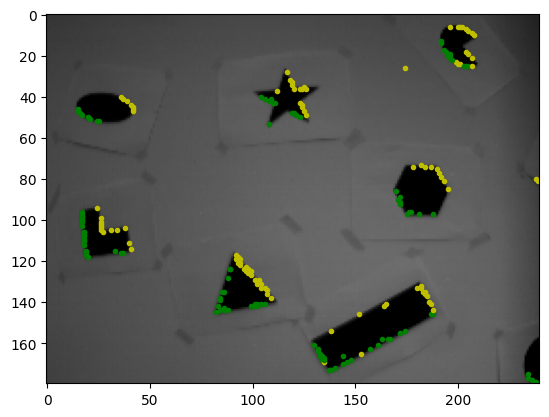

Processing Frames:  25%|██▌       | 1/4 [00:06<00:18,  6.06s/it]

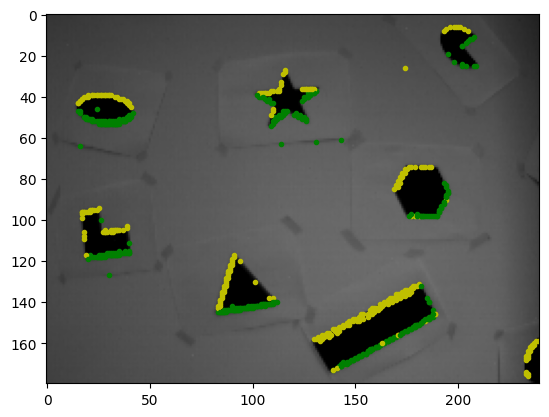

Processing Frames:  50%|█████     | 2/4 [00:12<00:12,  6.25s/it]

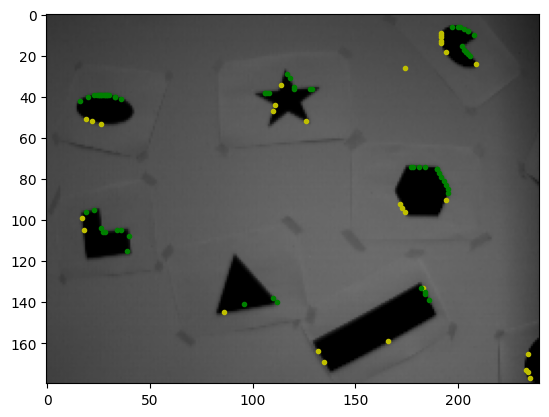

Processing Frames:  75%|███████▌  | 3/4 [00:18<00:06,  6.22s/it]

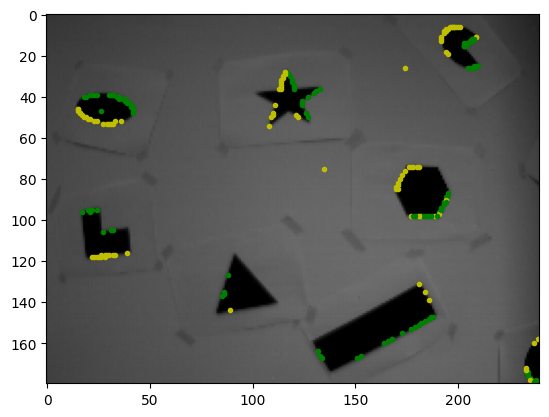

Processing Frames: 100%|██████████| 4/4 [00:24<00:00,  6.18s/it]


In [13]:
# Loop over the first 2 frames with tqdm progress bar
for i in tqdm(range(4), desc="Processing Frames"):
    # Load the image
    frame = cv2.imread(frame_files[i])

    # Find events in the temporal window
    temporal_window = 0.01  # You can adjust this window as needed
    event_mask = (event_timestamps >= (frame_timestamps[i] - temporal_window)) & \
                 (event_timestamps <= (frame_timestamps[i] + temporal_window))
    selected_xs = np.array(xs)[event_mask]
    selected_ys = np.array(ys)[event_mask]
    selected_polarities = np.array(polarities)[event_mask]

    # Display image
    plt.figure()
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

    # Overlay events
    for j in range(len(selected_xs)):
        if selected_polarities[j] > 0:
            plt.plot(selected_xs[j], selected_ys[j], 'y.')  # positive in yellow
        else:
            plt.plot(selected_xs[j], selected_ys[j], 'g.')  # negative in green

    plt.show()

    # Close the figure window
    plt.close('all')

### **Testing for shapes_translation files**

In [15]:
# Read frame timestamps and filenames
frame_timestamps_1, frame_files_1 = read_images_txt('images.txt', '/content/drive/MyDrive/Colab Notebooks/Data/shapes_translation')

# Read events
event_timestamps_1, xs_1, ys_1, polarities_1 = read_events_txt('events.txt', '/content/drive/MyDrive/Colab Notebooks/Data/shapes_translation')

Processing Frames:   0%|          | 0/4 [00:00<?, ?it/s]

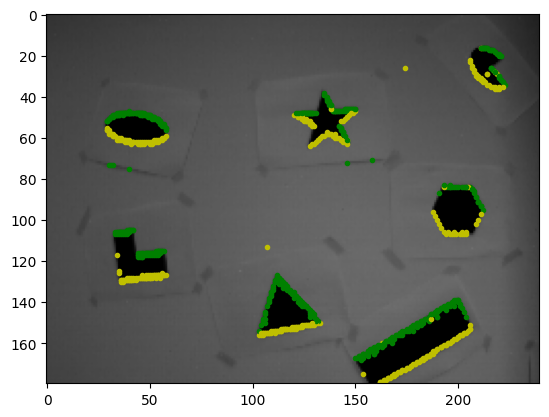

Processing Frames:  25%|██▌       | 1/4 [00:13<00:40, 13.38s/it]

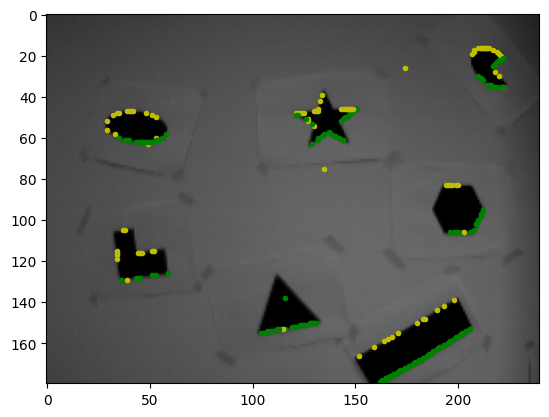

Processing Frames:  50%|█████     | 2/4 [00:18<00:17,  8.54s/it]

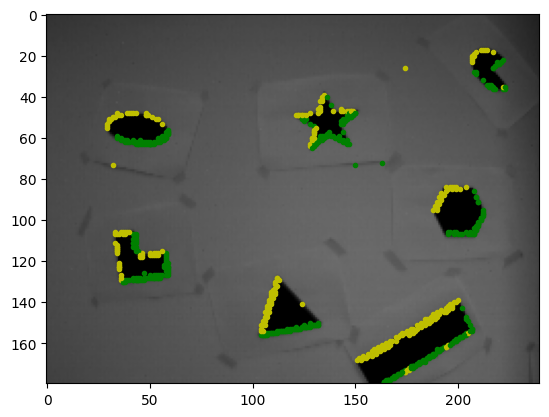

Processing Frames:  75%|███████▌  | 3/4 [00:23<00:07,  7.11s/it]

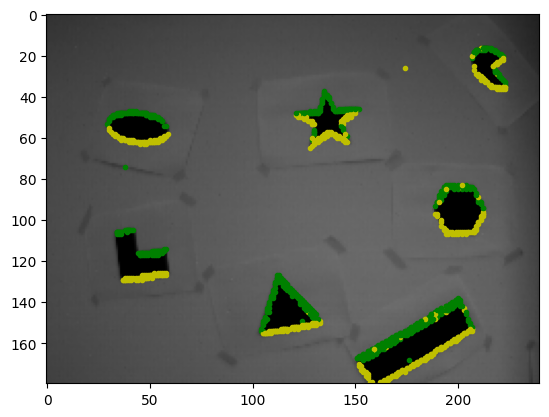

Processing Frames: 100%|██████████| 4/4 [00:29<00:00,  7.42s/it]


In [16]:
# Loop over the first 2 frames with tqdm progress bar
for i in tqdm(range(4), desc="Processing Frames"):
    # Load the image
    frame = cv2.imread(frame_files_1[i])

    # Find events in the temporal window
    temporal_window = 0.01  # You can adjust this window as needed
    event_mask = (event_timestamps_1 >= (frame_timestamps_1[i] - temporal_window)) & \
                 (event_timestamps_1 <= (frame_timestamps_1[i] + temporal_window))
    selected_xs = np.array(xs_1)[event_mask]
    selected_ys = np.array(ys_1)[event_mask]
    selected_polarities = np.array(polarities_1)[event_mask]

    # Display image
    plt.figure()
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

    # Overlay events
    for j in range(len(selected_xs)):
        if selected_polarities[j] > 0:
            plt.plot(selected_xs[j], selected_ys[j], 'y.')  # positive in yellow
        else:
            plt.plot(selected_xs[j], selected_ys[j], 'g.')  # negative in green

    plt.show()

    # Close the figure window
    plt.close('all')

### **Testing for shapes_6dof files**

In [17]:
# Read frame timestamps and filenames
frame_timestamps_2, frame_files_2 = read_images_txt('images.txt', '/content/drive/MyDrive/Colab Notebooks/Data/shapes_6dof')

# Read events
event_timestamps_2, xs_2, ys_2, polarities_2 = read_events_txt('events.txt', '/content/drive/MyDrive/Colab Notebooks/Data/shapes_6dof')

Processing Frames:   0%|          | 0/4 [00:00<?, ?it/s]

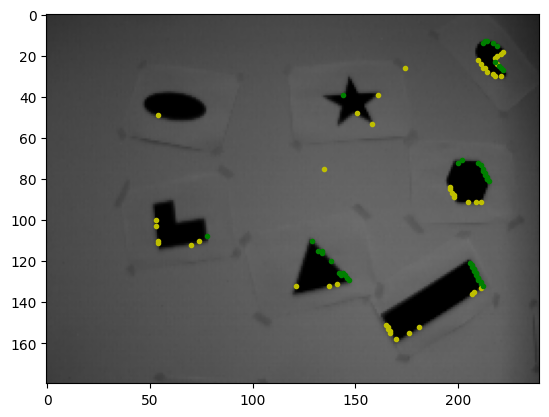

Processing Frames:  25%|██▌       | 1/4 [00:05<00:16,  5.39s/it]

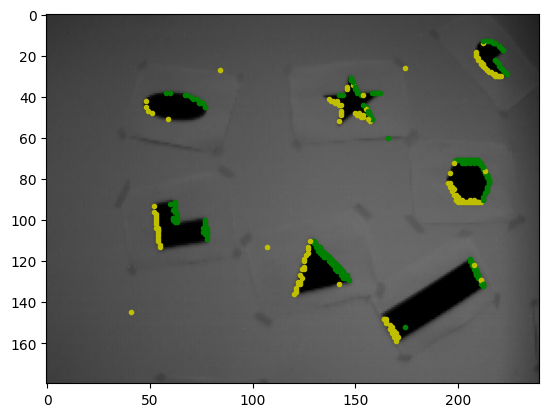

Processing Frames:  50%|█████     | 2/4 [00:12<00:12,  6.37s/it]

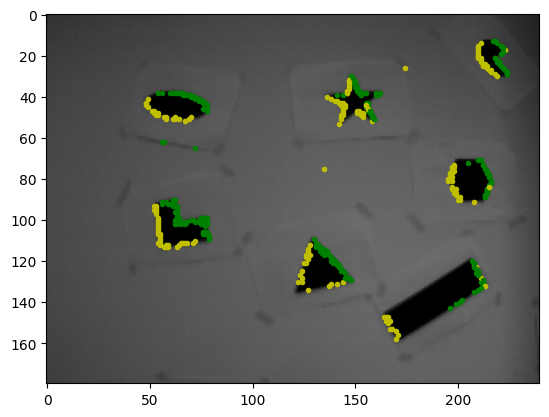

Processing Frames:  75%|███████▌  | 3/4 [00:17<00:05,  5.92s/it]

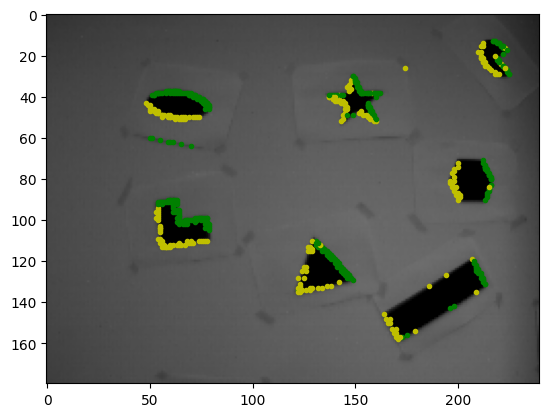

Processing Frames: 100%|██████████| 4/4 [00:24<00:00,  6.20s/it]


In [18]:
# Loop over the first 2 frames with tqdm progress bar
for i in tqdm(range(4), desc="Processing Frames"):
    # Load the image
    frame = cv2.imread(frame_files_2[i])

    # Find events in the temporal window
    temporal_window = 0.01  # You can adjust this window as needed
    event_mask = (event_timestamps_2 >= (frame_timestamps_2[i] - temporal_window)) & \
                 (event_timestamps_2 <= (frame_timestamps_2[i] + temporal_window))
    selected_xs = np.array(xs_2)[event_mask]
    selected_ys = np.array(ys_2)[event_mask]
    selected_polarities = np.array(polarities_2)[event_mask]

    # Display image
    plt.figure()
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

    # Overlay events
    for j in range(len(selected_xs)):
        if selected_polarities[j] > 0:
            plt.plot(selected_xs[j], selected_ys[j], 'y.')  # positive in yellow
        else:
            plt.plot(selected_xs[j], selected_ys[j], 'g.')  # negative in green

    plt.show()

    # Close the figure window
    plt.close('all')

### **Testing for outdors_walking files**

In [22]:
# Read frame timestamps and filenames
frame_timestamps_3, frame_files_3 = read_images_txt('images.txt', '/content/drive/MyDrive/Colab Notebooks/Data/outdoors_walking')

# Read events
event_timestamps_3, xs_3, ys_3, polarities_3 = read_events_txt('events.txt', '/content/drive/MyDrive/Colab Notebooks/Data/outdoors_walking')

### **Changin the temporal window**
In our case we only tested the changing results of temporal windows on the shapes_rotation dataset.

* For temporal window = 0.1

Processing Frames:   0%|          | 0/4 [00:00<?, ?it/s]

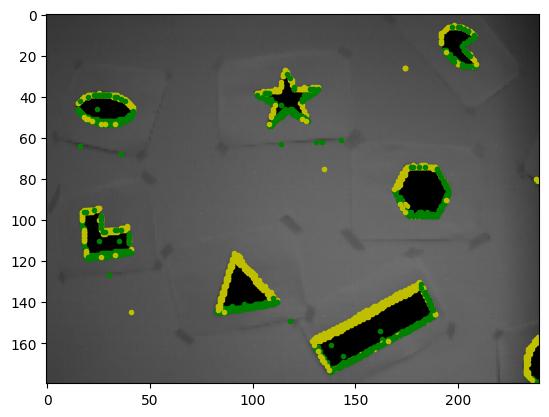

Processing Frames:  25%|██▌       | 1/4 [00:10<00:32, 10.68s/it]

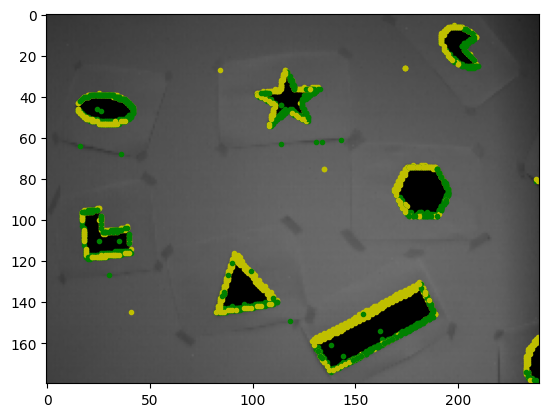

Processing Frames:  50%|█████     | 2/4 [00:21<00:21, 10.90s/it]

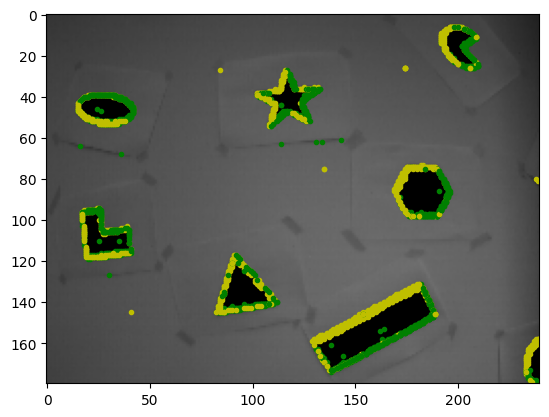

Processing Frames:  75%|███████▌  | 3/4 [00:34<00:11, 11.78s/it]

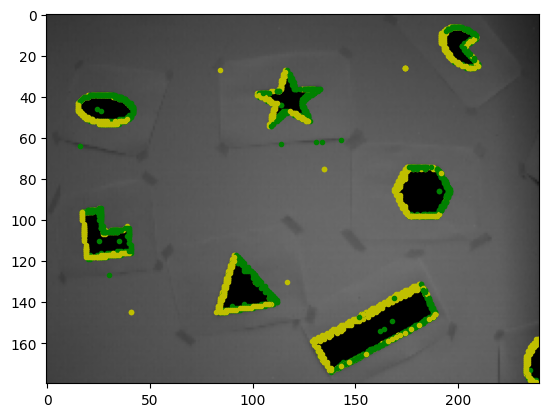

Processing Frames: 100%|██████████| 4/4 [00:45<00:00, 11.38s/it]


In [19]:
# Loop over the first 2 frames with tqdm progress bar
for i in tqdm(range(4), desc="Processing Frames"):
    # Load the image
    frame = cv2.imread(frame_files[i])

    # Find events in the temporal window
    temporal_window = 0.1  # You can adjust this window as needed
    event_mask = (event_timestamps >= (frame_timestamps[i] - temporal_window)) & \
                 (event_timestamps <= (frame_timestamps[i] + temporal_window))
    selected_xs = np.array(xs)[event_mask]
    selected_ys = np.array(ys)[event_mask]
    selected_polarities = np.array(polarities)[event_mask]

    # Display image
    plt.figure()
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

    # Overlay events
    for j in range(len(selected_xs)):
        if selected_polarities[j] > 0:
            plt.plot(selected_xs[j], selected_ys[j], 'y.')  # positive in yellow
        else:
            plt.plot(selected_xs[j], selected_ys[j], 'g.')  # negative in green

    plt.show()

    # Close the figure window
    plt.close('all')

* For temporal window = 0.5

Processing Frames:   0%|          | 0/4 [00:00<?, ?it/s]

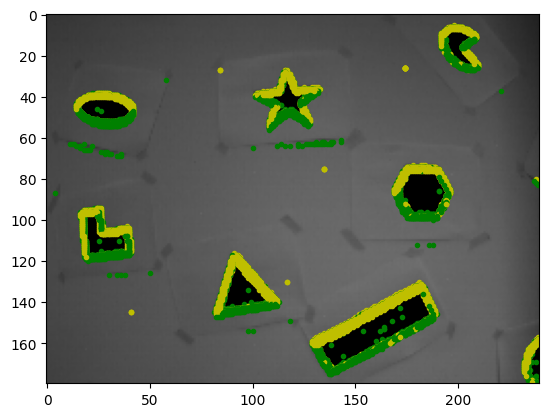

Processing Frames:  25%|██▌       | 1/4 [00:24<01:13, 24.45s/it]

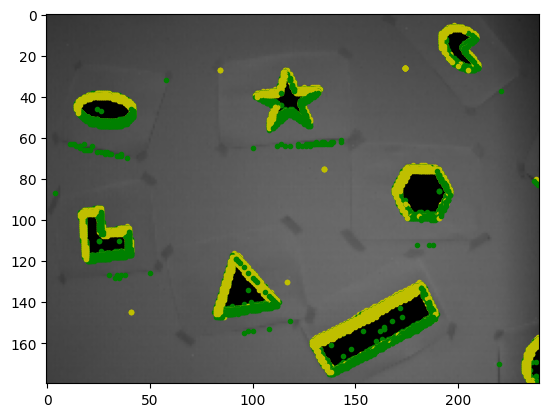

Processing Frames:  50%|█████     | 2/4 [00:53<00:54, 27.38s/it]

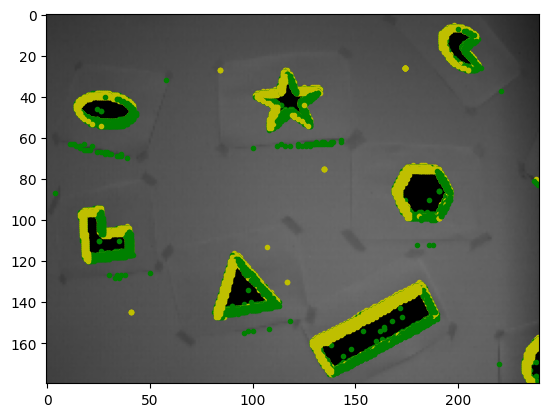

Processing Frames:  75%|███████▌  | 3/4 [01:19<00:26, 26.63s/it]

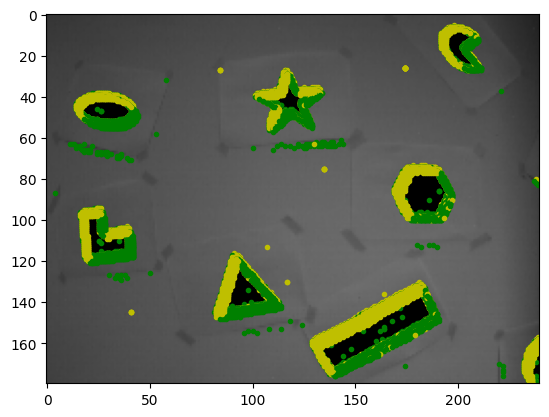

Processing Frames: 100%|██████████| 4/4 [01:51<00:00, 27.83s/it]


In [20]:
# Loop over the first 2 frames with tqdm progress bar
for i in tqdm(range(4), desc="Processing Frames"):
    # Load the image
    frame = cv2.imread(frame_files[i])

    # Find events in the temporal window
    temporal_window = 0.5  # You can adjust this window as needed
    event_mask = (event_timestamps >= (frame_timestamps[i] - temporal_window)) & \
                 (event_timestamps <= (frame_timestamps[i] + temporal_window))
    selected_xs = np.array(xs)[event_mask]
    selected_ys = np.array(ys)[event_mask]
    selected_polarities = np.array(polarities)[event_mask]

    # Display image
    plt.figure()
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

    # Overlay events
    for j in range(len(selected_xs)):
        if selected_polarities[j] > 0:
            plt.plot(selected_xs[j], selected_ys[j], 'y.')  # positive in yellow
        else:
            plt.plot(selected_xs[j], selected_ys[j], 'g.')  # negative in green

    plt.show()

    # Close the figure window
    plt.close('all')

* For temporal window = 1.0

Processing Frames:   0%|          | 0/4 [00:00<?, ?it/s]

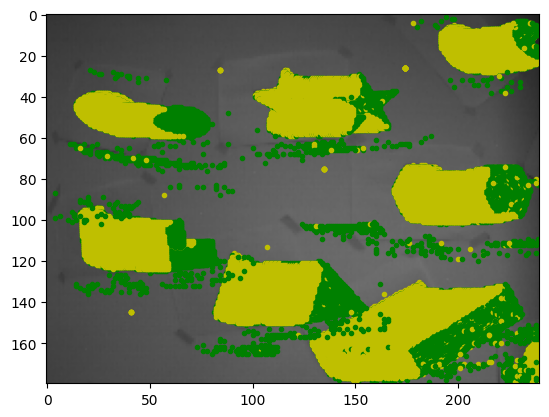

Processing Frames:  25%|██▌       | 1/4 [01:39<04:59, 99.75s/it]

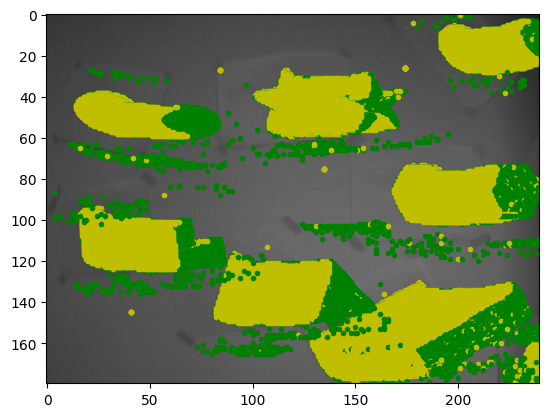

Processing Frames:  50%|█████     | 2/4 [03:26<03:28, 104.16s/it]

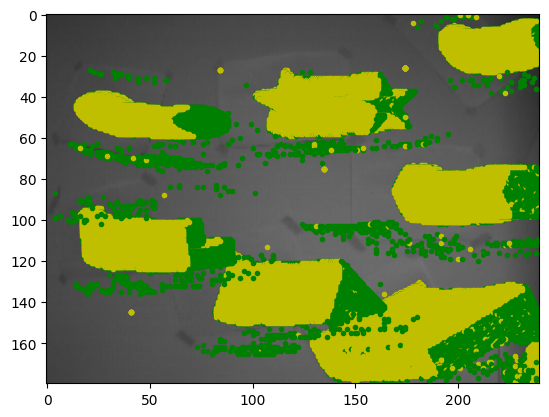

Processing Frames:  75%|███████▌  | 3/4 [05:19<01:48, 108.18s/it]

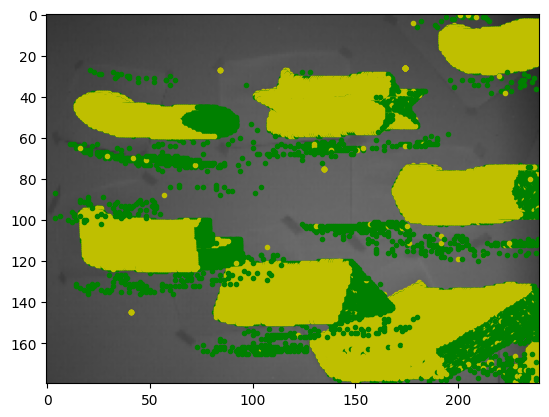

Processing Frames: 100%|██████████| 4/4 [07:21<00:00, 110.38s/it]


In [21]:
# Loop over the first 2 frames with tqdm progress bar
for i in tqdm(range(4), desc="Processing Frames"):
    # Load the image
    frame = cv2.imread(frame_files[i])

    # Find events in the temporal window
    temporal_window = 1.0  # You can adjust this window as needed
    event_mask = (event_timestamps >= (frame_timestamps[i] - temporal_window)) & \
                 (event_timestamps <= (frame_timestamps[i] + temporal_window))
    selected_xs = np.array(xs)[event_mask]
    selected_ys = np.array(ys)[event_mask]
    selected_polarities = np.array(polarities)[event_mask]

    # Display image
    plt.figure()
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

    # Overlay events
    for j in range(len(selected_xs)):
        if selected_polarities[j] > 0:
            plt.plot(selected_xs[j], selected_ys[j], 'y.')  # positive in yellow
        else:
            plt.plot(selected_xs[j], selected_ys[j], 'g.')  # negative in green

    plt.show()

    # Close the figure window
    plt.close('all')

# **Events data for objects tracking**
### 1. With data from the first sequence, plot events in a 3D volume with x, y and t (timestamp) as the 3rd dimension.

In [2]:
import matplotlib.patches as patches
from PIL import Image

# Function to parse the content of images.txt
def parse_images_data(images_data):
    parsed_data = []
    for line in images_data:
        parts = line.strip().split(' ')

        timestamp = float(parts[0])
        filename = parts[1]
        parsed_data.append((timestamp, filename))
    return parsed_data

# Function to parse the content of events_shortened.txt
def parse_events_data(events_data):
    parsed_data = []
    for line in events_data:
        parts = line.strip().split(' ')
        timestamp = float(parts[0])
        x = int(parts[1])
        y = int(parts[2])
        polarity = int(parts[3])
        parsed_data.append((timestamp, x, y, polarity))
    return parsed_data

def display_images_with_events_pil(images_info, events, temporal_window):
    for image_info in images_info:
        frame_timestamp, image_path = image_info
        image = Image.open(image_path)

        # Create a figure and axis to plot the image
        fig, ax = plt.subplots()
        # Plot the image with grayscale color map
        ax.imshow(image, cmap='gray')

        # Plot the events within the temporal window
        for event in events:
            event_timestamp, x, y, polarity = event
            if frame_timestamp - temporal_window / 2 <= event_timestamp <= frame_timestamp + temporal_window / 2:
                # Set the color: red for positive polarity, blue for negative
                color = 'r' if polarity == 1 else 'b'
                # Draw the event as a small circle
                circ = patches.Circle((x, y), radius=1, color=color)
                ax.add_patch(circ)

        # Remove axis for better visualization
        plt.axis('off')
        plt.title(f'Frame at {frame_timestamp}s with Events')
        plt.show()

In [3]:
parsed_images = []
parsed_events = []

with open('/content/drive/MyDrive/Colab Notebooks/Data/shapes_translation/images.txt') as f:
    images_data = f.readlines()
with open('/content/drive/MyDrive/Colab Notebooks/Data/shapes_translation/events.txt') as f:
    events_data = f.readlines()

# Parse the data
parsed_images = parse_images_data(images_data)
parsed_events = parse_events_data(events_data)

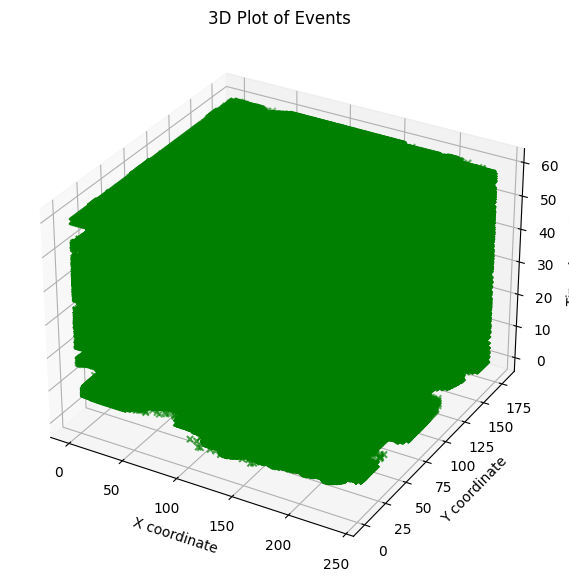

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extracting x, y coordinates and timestamps from the events for 3D plotting
x_coords = [event[1] for event in parsed_events]
y_coords = [event[2] for event in parsed_events]
timestamps = [event[0] for event in parsed_events]

# Setting up the 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for events in the 3D space
sc = ax.scatter(x_coords, y_coords, timestamps, c='g', marker='x')

# Labeling the axes
ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')
ax.set_zlabel('Timestamp (s)')

# Title
plt.title('3D Plot of Events')

# Show the plot
plt.show()

2. RANSAC algorithm

The equation of the plane is: -0.38890394300130604x + 0.35059888734596445y - z + 95.18810651401134 = 0


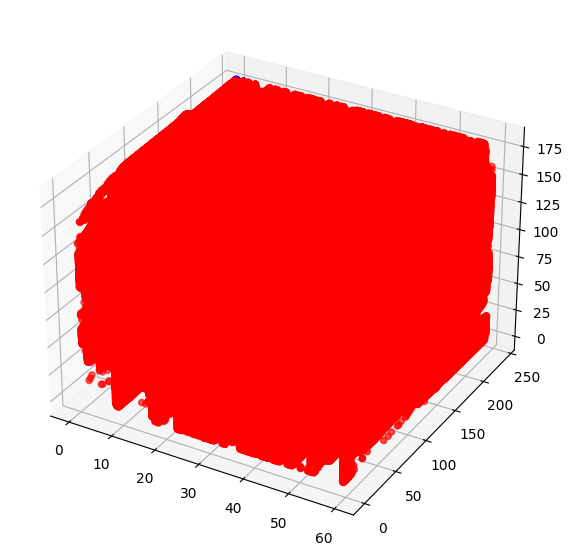

In [6]:
from sklearn.linear_model import RANSACRegressor
from sklearn.datasets import make_regression
import numpy as np

# Assuming events is a list of events with x, y, timestamp
# Since RANSAC in sklearn works for regression, we need to adapt our 3D points (x, y, t) for plane fitting
# We will consider 't' as our target variable and (x, y) as our features

# Prepare the events data for RANSAC
events = np.array(parsed_events)
X = events[:, :2]  # Features (x, y)
t = events[:, 2]   # Target (timestamp)

# Create a RANSAC regressor object
# Note: You would need to determine the appropriate values for `min_samples`, `residual_threshold`, etc.
ransac = RANSACRegressor(min_samples=3,
                         residual_threshold=1, # This is a distance threshold for inlier selection
                         max_trials=100)       # The maximum number of iterations

# Fit the RANSAC regressor
ransac.fit(X, t)

# Find inliers and the plane coefficients
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# The estimated coefficients are for the plane z = ax + by + c
# where 'a' and 'b' are the coefficients and 'c' is the intercept.
a, b = ransac.estimator_.coef_
c = ransac.estimator_.intercept_

# Plane equation coefficients
plane_normal = np.array([a, b, -1])
plane_distance = c

# Print the plane equation
print(f"The equation of the plane is: {a}x + {b}y - z + {c} = 0")

# You can now use plane_normal and plane_distance to further analyze the plane, or visualize the inliers/outliers.
# Note: This is a simplified example. In a real-world scenario, you may need to adapt the plane fitting
# process depending on the specific geometry and the RANSAC implementation details.
# Plotting the inliers and outliers
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the inliers
ax.scatter(X[inlier_mask][:, 0], X[inlier_mask][:, 1], t[inlier_mask], c='b', marker='o', label='Inliers')
# Plotting the outliers
ax.scatter(X[outlier_mask][:, 0], X[outlier_mask][:, 1], t[outlier_mask], c='r', marker='o', label='Outliers')

In [7]:
movement_vectors = []
timestamps = []

for i in range(1, len(events)):
    if inlier_mask[i] and inlier_mask[i-1]:  # Both events are inliers
        # Calculate movement in x and y
        movement_xy = events[i, :2] - events[i-1, :2]
        # Calculate movement in time (z)
        movement_t = events[i, 2] - events[i-1, 2]
        # Combine into a 3D movement vector
        movement = np.array([movement_xy[0], movement_xy[1], movement_t])
        movement_vectors.append(movement)
        timestamps.append(events[i, 2])

# Average the movement vectors
average_movement = np.mean(np.array(movement_vectors), axis=0)

# Project the average movement vector onto the plane
# The plane normal is already a 3D vector, so we do not need to modify it
movement_on_plane = average_movement - (np.dot(average_movement, plane_normal) / np.linalg.norm(plane_normal)**2) * plane_normal

# Normalize the movement vector on the plane
movement_vector = movement_on_plane / np.linalg.norm(movement_on_plane)

print(f"The unit vector of movement on the plane is: {movement_vector}")

The unit vector of movement on the plane is: [ 0.16445489 -0.90912049 -0.38269378]


# 4. Event-based visual flow
Implement the method described in Event-based visual flow paper from Ryad Benosman et al. and discuss the results obtained on the different sequences.

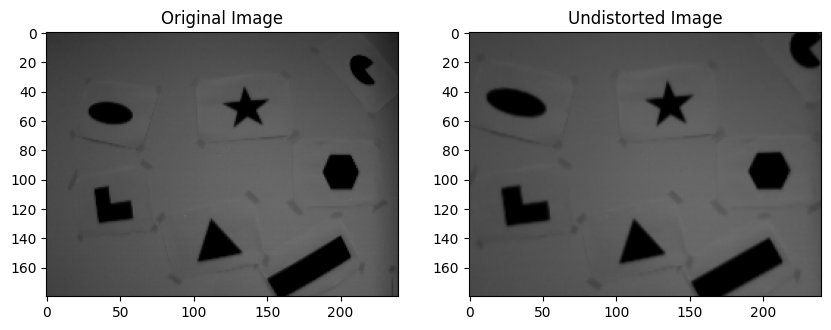

In [9]:
import cv2
import pandas as pd


def undistort_image(image_path, calib_params):
    # Assuming the calib_params is a pandas Series with camera parameters in order: fx fy cx cy k1 k2 p1 p2 k3
    fx, fy, cx, cy, k1, k2, p1, p2, k3 = calib_params

    # Camera matrix
    K = np.array([[fx, 0, cx],
                  [0, fy, cy],
                  [0, 0, 1]])

    # Distortion coefficients
    dist_coeffs = np.array([k1, k2, p1, p2, k3])

    # Read the image using OpenCV
    img = cv2.imread(image_path)

    # Check if image is loaded
    if img is None:
        raise ValueError("Image not found at the path provided.")

    # Convert image to RGB for matplotlib compatibility
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Undistort the image
    undistorted_img = cv2.undistort(img_rgb, K, dist_coeffs)

    return undistorted_img

# Load the calibration parameters from calib.txt
calib_params = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/shapes_translation/calib.txt', delimiter=' ', header=None).iloc[0]

# Specify the path to the image
image_path = '/content/drive/MyDrive/Colab Notebooks/Data/shapes_translation/images/frame_00000000.png'

# Use the function to undistort the image
undistorted_img = undistort_image(image_path, calib_params)

# Show the original and undistorted images
fig, axes = plt.subplots(1, 2, figsize=(10, 7))
axes[0].imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[1].imshow(undistorted_img)
axes[1].set_title('Undistorted Image')
plt.show()

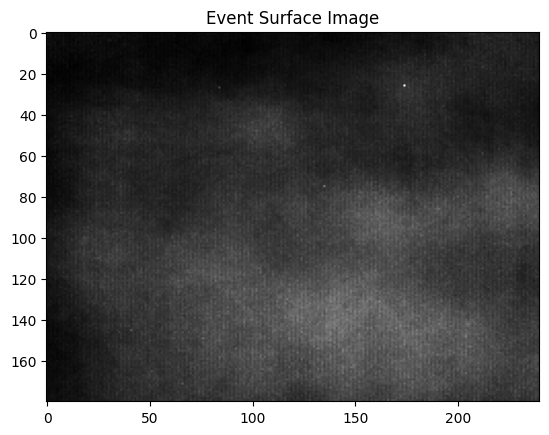

array([[22, 19, 19, ..., 29, 31, 19],
       [19, 17, 13, ..., 29, 24, 24],
       [23, 16, 14, ..., 23, 32, 23],
       ...,
       [16, 15, 20, ..., 57, 66, 63],
       [18, 12, 17, ..., 51, 71, 47],
       [14, 12, 14, ..., 49, 57, 48]], dtype=uint8)

In [11]:
# Read events from the text file into a DataFrame
events_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/shapes_translation/events.txt', delimiter=' ', names=['timestamp', 'x', 'y', 'polarity'])

# Assuming the shape of the event camera sensor is the same as the frame images for simplicity
image_shape = undistorted_img[:, :, 0].shape

# Initialize an event surface array
event_surface = np.zeros(image_shape, dtype=np.float32)

# Process events
# We will use a simple approach where the intensity is the count of events at that pixel.
# This can be replaced with a more sophisticated time-decay model if needed.
for i, event in events_df.iterrows():
    if 0 <= event.x < image_shape[1] and 0 <= event.y < image_shape[0]:  # Check bounds
        event_surface[int(event.y), int(event.x)] += 1

# Normalize the event surface image to the range [0, 255] and convert to uint8
event_surface_norm = cv2.normalize(event_surface, None, 0, 255, cv2.NORM_MINMAX)
event_surface_img = np.uint8(event_surface_norm)

# Display the event surface image using matplotlib
plt.imshow(event_surface_img, cmap='gray')
plt.title('Event Surface Image')
plt.show()

# Return the event surface image for further processing
event_surface_img

## **Visualizing the flow**

In [12]:
# Assume event_surface_img is the event surface image obtained from previous steps
event_surface_img = event_surface_img  # This should be the event surface image you computed earlier

# Initialize the flow field
flow_field_x = np.zeros_like(event_surface_img, dtype=np.float32)  # Flow in x direction
flow_field_y = np.zeros_like(event_surface_img, dtype=np.float32)  # Flow in y direction

# Compute the gradient of the event surface
grad_y, grad_x = np.gradient(event_surface_img.astype(np.float32))

# Estimate the flow at each point
# For simplicity, we assume the flow is proportional to the gradient
flow_field_x = grad_x
flow_field_y = grad_y

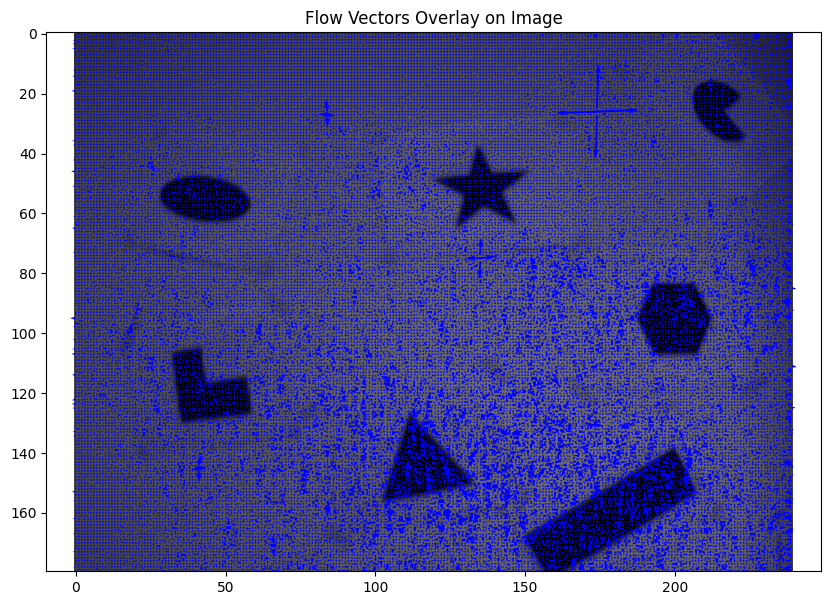

In [13]:
# Load the corresponding image (make sure to replace 'image_path' with the actual path to your image)
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Create a grid of coordinates corresponding to the image pixels (if not already created)
x, y = np.meshgrid(np.arange(0, image.shape[1]), np.arange(0, image.shape[0]))

# Scale the flow vectors for visualization purposes
scale_factor = 0.1  # Adjust scale factor as needed for your visualization
flow_field_x_scaled = flow_field_x * scale_factor
flow_field_y_scaled = flow_field_y * scale_factor

# Create the quiver plot
plt.figure(figsize=(10, 7))
plt.imshow(image_rgb)
plt.quiver(x, y, flow_field_x_scaled, flow_field_y_scaled, color='b')

# Optionally, you can set the aspect ratio to equal for better interpretation of vector directions
plt.axis('equal')

plt.title('Flow Vectors Overlay on Image')
plt.show()

## **Comparing with ground truth**

In [14]:
# Read the ground truth data
ground_truth_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/shapes_translation/groundtruth.txt', delimiter=' ', names=['timestamp', 'px', 'py', 'pz', 'qx', 'qy', 'qz', 'qw'])

def align_ground_truth(ground_truth_df, timestamps):
    # Ensure the timestamps are in a DataFrame and merge with ground truth on the closest less than equal timestamp
    timestamps_df = pd.DataFrame({'timestamp': timestamps})
    merged_df = pd.merge_asof(timestamps_df.sort_values('timestamp'), ground_truth_df.sort_values('timestamp'),
                              on='timestamp', direction='nearest')

    # Interpolate the merged DataFrame to fill in missing values at the event timestamps
    # This assumes that the ground truth DataFrame is indexed by the timestamp
    # You may need to set the index of ground_truth_df to 'timestamp' if it is not already
    interpolated_df = merged_df.interpolate(method='linear')

    # If the timestamps are outside the range of ground truth measurements, fill them using the closest values
    interpolated_df = interpolated_df.fillna(method='ffill').fillna(method='bfill')

    return interpolated_df

# Extract the 'timestamp' column to create the event_timestamps array
event_timestamps = events_df['timestamp'].values

# Align the ground truth data with the timestamps of the events used for the flow computation
aligned_ground_truth = align_ground_truth(ground_truth_df, event_timestamps)

# Calculate the difference in position between each row to approximate the flow
ground_truth_df[['flow_x', 'flow_y', 'flow_z']] = ground_truth_df[['px', 'py', 'pz']].diff()

In [15]:
import pandas as pd

def calculate_flow_from_ground_truth(ground_truth_df, camera_intrinsics):
    """
    Convert 3D ground truth motion into 2D motion vectors in the image plane.

    Parameters:
    ground_truth_df (DataFrame): DataFrame with columns ['timestamp', 'px', 'py', 'pz', 'qx', 'qy', 'qz', 'qw'].
    camera_intrinsics (dict): Dictionary with camera intrinsic parameters {'fx', 'fy', 'cx', 'cy'}.

    Returns:
    DataFrame: The input DataFrame with added columns ['flow_in_image_x', 'flow_in_image_y'] for 2D flow.
    """
    # Calculate differences in positions to get ground truth flow in 3D
    ground_truth_df[['flow_x', 'flow_y', 'flow_z']] = ground_truth_df[['px', 'py', 'pz']].diff().fillna(0)

    # TODO: Apply rotation from quaternion to 3D flow vectors (This part is non-trivial and depends on your specific needs)
    # For now, we're skipping this step and assuming no rotation or that it's already been accounted for.

    # Project 3D flow to 2D in the image plane
    # This simplistic projection assumes the flow is mostly parallel to the image plane and ignores depth effects.
    # For more accurate projection, consider the full pinhole camera model and depth information.
    ground_truth_df['flow_in_image_x'] = ground_truth_df['flow_x'] * camera_intrinsics['fx'] + camera_intrinsics['cx']
    ground_truth_df['flow_in_image_y'] = ground_truth_df['flow_y'] * camera_intrinsics['fy'] + camera_intrinsics['cy']

    return ground_truth_df

# Usage:
fx, fy, cx, cy, k1, k2, p1, p2, k3 = calib_params
camera_intrinsics = {'fx': fx, 'fy': fy, 'cx': cx, 'cy': cy}  # Replace with actual camera intrinsic parameters
ground_truth_2d_flow = calculate_flow_from_ground_truth(ground_truth_df, camera_intrinsics)

Ground truth motion vector: (132.080123679453, 111.01892089459312)
MSE X: 17416.97808097328, MSE Y: 12282.823944356525


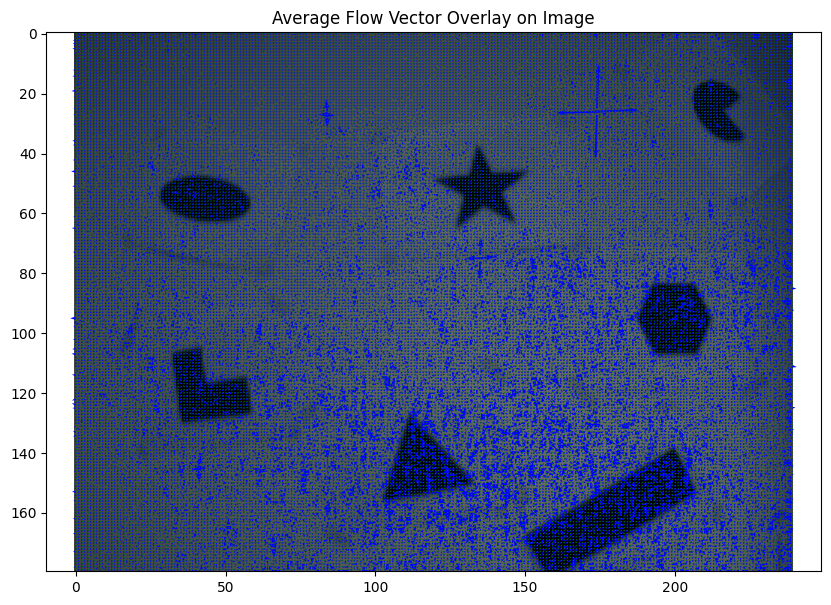

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

average_flow_x = np.mean(flow_field_x)
average_flow_y = np.mean(flow_field_y)

ground_truth_motion_x = ground_truth_2d_flow['flow_in_image_x'].iloc[-1]
ground_truth_motion_y = ground_truth_2d_flow['flow_in_image_y'].iloc[-1]
print(f"Ground truth motion vector: ({ground_truth_motion_x}, {ground_truth_motion_y})")

# Now compare these average flow values with the ground truth motion vector
mse_x = mean_squared_error([ground_truth_motion_x], [average_flow_x])
mse_y = mean_squared_error([ground_truth_motion_y], [average_flow_y])

print(f"MSE X: {mse_x}, MSE Y: {mse_y}")

#Illustrate the ground truth motion vector compared to the average flow vector
plt.figure(figsize=(10, 7))
plt.imshow(image_rgb)
plt.quiver(x, y, flow_field_x_scaled, flow_field_y_scaled, color='b')
plt.quiver(x, y, ground_truth_motion_x, ground_truth_motion_y, color='g')
plt.axis('equal')
plt.title('Average Flow Vector Overlay on Image')
plt.show()